# Sklearn Support Vector Regression examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Linear example
Generating data points from a linear objective function with gaussian noise

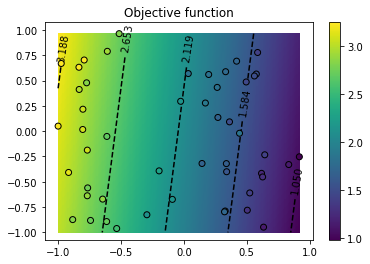

In [2]:
npoints = 50
noise = 0.1
w = np.random.randn(3)

X = np.random.rand(npoints, 2)*2 -1
y = np.matmul(X,w[:2])+w[2] + (np.random.randn(npoints)*noise)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.c_[X1.ravel(), X2.ravel()],w[:2])+w[2]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

Linear SVR
Score: 0.977697


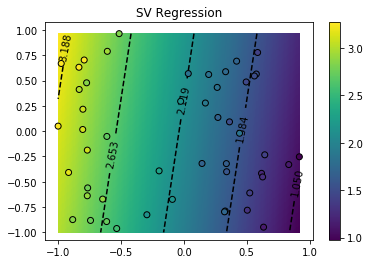

In [3]:
print("Linear SVR")
svr_lin = svm.SVR(C=1.0, epsilon=0.1, kernel='linear')
svr_lin.fit(X,y)
print("Score: %f" % svr_lin.score(X,y))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

SVR with grid search model selection

Best parameters set found on development set:
{'C': 2, 'kernel': 'linear', 'epsilon': 0.1}
Test score: 0.976951


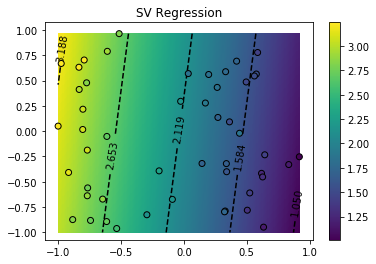

In [4]:
print("SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)


param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=2)
svreg.fit(X_TrainAndValidation, y_TrainAndValidation)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = svreg.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

# Nonlinear example

Generating data points from a nonlinear objective function with gaussian noise

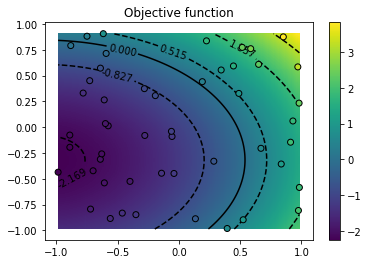

In [5]:
npoints = 50
noise = 0.1
w = np.random.randn(5)

X = np.random.rand(npoints, 2)*2 -1
X_t = np.concatenate((X, X**2), axis=1)
y = np.matmul(X_t,w[:4])+w[4] + (np.random.randn(npoints)*noise)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.concatenate((np.c_[X1.ravel(), X2.ravel()],np.c_[X1.ravel(), X2.ravel()]**2), axis=1),w[:4])+w[4]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

SVR with grid search model selection

Best parameters set found on development set:
{'gamma': 1, 'C': 4, 'coef0': 1, 'degree': 2, 'kernel': 'poly', 'epsilon': 0.01}
Test score: 0.993090


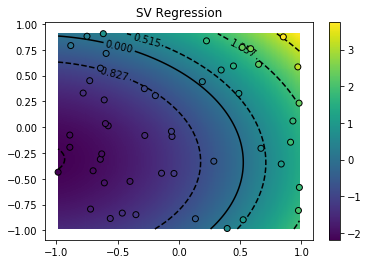

In [6]:
print("SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [1,2,3,4], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=2, n_jobs=4)
svreg.fit(X_TrainAndValidation, y_TrainAndValidation)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = svreg.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()